# SimpleImgClassifier
Use TensorFlow to recognize between several classes of objects.

## Classify Target: Monkey Species Dataset
I choose to train a classifier to recognize between several different monkey species by using TensorFlow.

In [1]:
import tensorflow as tf
import data
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from data import DataPipeline
from tensorflow.python.platform import gfile
from model import SeqNnModelGenerator

Here I use a class DataPipeline, which is designed in the data.py. This class provide some function to load image data and labels info  
'monkey_labels.txt' contains all the labels info

In [2]:
images_dir = r'.\images\10-monkey-species\training'
labels = r'.\images\10-monkey-species\monkey_labels.txt'

In [8]:
import pandas as pd
file_path = os.getcwd()
labels_path = os.path.join(file_path, r'images\10-monkey-species\monkey_labels.txt')
table = pd.read_table(labels_path, sep='\s*,\s*', engine='python')
table

,Label,Label_Val,Latin Name,Common Name,Train Images,Validation Images
0,n0,0,alouatta_palliata,mantled_howler,131,26
1,n1,1,erythrocebus_patas,patas_monkey,139,28
2,n2,2,cacajao_calvus,bald_uakari,137,27
3,n3,3,macaca_fuscata,japanese_macaque,152,30
4,n4,4,cebuella_pygmea,pygmy_marmoset,131,26
5,n5,5,cebus_capucinus,white_headed_capuchin,141,28
6,n6,6,mico_argentatus,silvery_marmoset,132,26
7,n7,7,saimiri_sciureus,common_squirrel_monkey,142,28
8,n8,8,aotus_nigriceps,black_headed_night_monkey,133,27
9,n9,9,trachypithecus_johnii,nilgiri_langur,132,26


In [3]:
dp = DataPipeline(images_dir, labels, image_size=[128, 128])

use get_input_dataset method to get the image dataset and label dataset, the batch size is 500, validation percentage is 30%

In [6]:
ds = dp.get_input_dataset(0.3, 500)

Looking for images in 'n0'
Looking for images in 'n1'
Looking for images in 'n2'
Looking for images in 'n3'
Looking for images in 'n4'
Looking for images in 'n5'
Looking for images in 'n6'
Looking for images in 'n7'
Looking for images in 'n8'
Looking for images in 'n9'


take a look at the image we are going to train

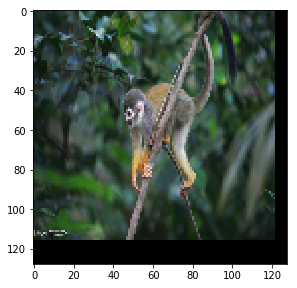

common_squirrel_monkey


In [20]:
data_aug_iter = ds["training"].make_one_shot_iterator()
next_element = data_aug_iter.get_next()
sess = tf.Session() 
batch_of_imgs, label = sess.run(next_element)
    
#Running next element in our graph will produce a batch of images
plt.figure(figsize=(10, 10))
img = batch_of_imgs[0]

plt.subplot(1, 2, 1)
plt.imshow(img)

plt.show()

l = np.argmax(label[0], 0)
print(table[table.Label_Val == l]['Common Name'][l])

In [13]:
table[table.Label == dp.label_name_val_dict[3]]['Common Name'][0]

'mantled_howler'

Now, create a self designed model in the model.py

In [21]:
from model import CnnModel
cnn_model = CnnModel((dp.image_size[0], dp.image_size[1], dp.image_channels), dp.labels_classes)

In [22]:
new_model = cnn_model.get_model()
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
__________

Start training....

In [57]:
self_adam = tf.keras.optimizers.Adam(lr=0.0001)
new_model.compile(optimizer=self_adam, loss='categorical_crossentropy', metrics=['accuracy'])
new_model_save_path = r'.\ten_monkeys_conv_weights.hdf5'
new_cp = tf.keras.callbacks.ModelCheckpoint(filepath=new_model_save_path, monitor='val_acc', save_best_only=True, verbose=1)
new_history = new_model.fit(ds["training"], 
                            steps_per_epoch=int(np.ceil(dp.training_count / 500.)), 
                            epochs=200, 
                            validation_data=ds["validation"],
                            validation_steps=int(np.ceil(dp.validation_count / 500.)),
                            callbacks=[new_cp])

Epoch 1/200
1/2 [==============>...............] - ETA: 36s - loss: 2.3159 - acc: 0.1100
Epoch 00001: val_acc improved from -inf to 0.14600, saving model to .\ten_monkeys_conv_weights.hdf5
2/2 [==============================] - 94s 47s/step - loss: 2.2993 - acc: 0.1300 - val_loss: 2.2676 - val_acc: 0.1460
Epoch 2/200
1/2 [==============>...............] - ETA: 22s - loss: 2.2780 - acc: 0.1320
Epoch 00002: val_acc improved from 0.14600 to 0.20200, saving model to .\ten_monkeys_conv_weights.hdf5
2/2 [==============================] - 77s 38s/step - loss: 2.2681 - acc: 0.1370 - val_loss: 2.2290 - val_acc: 0.2020
Epoch 3/200
1/2 [==============>...............] - ETA: 31s - loss: 2.2213 - acc: 0.1620
Epoch 00003: val_acc improved from 0.20200 to 0.29400, saving model to .\ten_monkeys_conv_weights.hdf5
2/2 [==============================] - 68s 34s/step - loss: 2.2216 - acc: 0.1790 - val_loss: 2.1796 - val_acc: 0.2940
Epoch 4/200
1/2 [==============>...............] - ETA: 33s - loss: 2.188

Epoch 61/200
1/2 [==============>...............] - ETA: 36s - loss: 1.1278 - acc: 0.5920
Epoch 00061: val_acc improved from 0.59800 to 0.60600, saving model to .\ten_monkeys_conv_weights.hdf5
2/2 [==============================] - 73s 36s/step - loss: 1.1076 - acc: 0.6080 - val_loss: 1.2473 - val_acc: 0.6060
Epoch 62/200
1/2 [==============>...............] - ETA: 33s - loss: 1.1429 - acc: 0.6200
Epoch 00062: val_acc did not improve from 0.60600
2/2 [==============================] - 86s 43s/step - loss: 1.1319 - acc: 0.6130 - val_loss: 1.2910 - val_acc: 0.5720
Epoch 63/200
1/2 [==============>...............] - ETA: 22s - loss: 1.1120 - acc: 0.6200
Epoch 00063: val_acc did not improve from 0.60600
2/2 [==============================] - 71s 35s/step - loss: 1.0977 - acc: 0.6180 - val_loss: 1.2844 - val_acc: 0.5720
Epoch 64/200
1/2 [==============>...............] - ETA: 34s - loss: 1.0904 - acc: 0.5980
Epoch 00064: val_acc did not improve from 0.60600
2/2 [============================

Epoch 124/200
1/2 [==============>...............] - ETA: 34s - loss: 0.7689 - acc: 0.7520
Epoch 00124: val_acc did not improve from 0.66000
2/2 [==============================] - 90s 45s/step - loss: 0.7710 - acc: 0.7380 - val_loss: 1.2461 - val_acc: 0.5860
Epoch 125/200
1/2 [==============>...............] - ETA: 26s - loss: 0.7853 - acc: 0.7400
Epoch 00125: val_acc did not improve from 0.66000
2/2 [==============================] - 81s 41s/step - loss: 0.7578 - acc: 0.7600 - val_loss: 1.1610 - val_acc: 0.6140
Epoch 126/200
1/2 [==============>...............] - ETA: 36s - loss: 0.7646 - acc: 0.7360
Epoch 00126: val_acc did not improve from 0.66000
2/2 [==============================] - 79s 39s/step - loss: 0.7864 - acc: 0.7250 - val_loss: 1.1365 - val_acc: 0.6240
Epoch 127/200
1/2 [==============>...............] - ETA: 33s - loss: 0.7522 - acc: 0.7660
Epoch 00127: val_acc did not improve from 0.66000
2/2 [==============================] - 83s 41s/step - loss: 0.7307 - acc: 0.7640 -

Epoch 156/200
1/2 [==============>...............] - ETA: 39s - loss: 0.6595 - acc: 0.7680
Epoch 00156: val_acc did not improve from 0.66000
2/2 [==============================] - 105s 53s/step - loss: 0.6491 - acc: 0.7700 - val_loss: 1.1456 - val_acc: 0.6240
Epoch 157/200
1/2 [==============>...............] - ETA: 29s - loss: 0.6826 - acc: 0.7680
Epoch 00157: val_acc did not improve from 0.66000
2/2 [==============================] - 93s 46s/step - loss: 0.6620 - acc: 0.7780 - val_loss: 1.1397 - val_acc: 0.6360
Epoch 158/200
1/2 [==============>...............] - ETA: 45s - loss: 0.6723 - acc: 0.7720
Epoch 00158: val_acc did not improve from 0.66000
2/2 [==============================] - 99s 49s/step - loss: 0.6658 - acc: 0.7840 - val_loss: 1.1483 - val_acc: 0.6360
Epoch 159/200
1/2 [==============>...............] - ETA: 43s - loss: 0.6565 - acc: 0.7940
Epoch 00159: val_acc improved from 0.66000 to 0.66400, saving model to .\ten_monkeys_conv_weights.hdf5
2/2 [=======================

Epoch 187/200
1/2 [==============>...............] - ETA: 43s - loss: 0.5538 - acc: 0.8100
Epoch 00187: val_acc did not improve from 0.67600
2/2 [==============================] - 84s 42s/step - loss: 0.5274 - acc: 0.8250 - val_loss: 1.1332 - val_acc: 0.6380
Epoch 188/200
1/2 [==============>...............] - ETA: 41s - loss: 0.5461 - acc: 0.8220
Epoch 00188: val_acc did not improve from 0.67600
2/2 [==============================] - 179s 90s/step - loss: 0.5329 - acc: 0.8160 - val_loss: 1.1829 - val_acc: 0.6420
Epoch 189/200
1/2 [==============>...............] - ETA: 50s - loss: 0.5614 - acc: 0.8240
Epoch 00189: val_acc did not improve from 0.67600
2/2 [==============================] - 119s 60s/step - loss: 0.5596 - acc: 0.8200 - val_loss: 1.1428 - val_acc: 0.6420
Epoch 190/200
1/2 [==============>...............] - ETA: 55s - loss: 0.5220 - acc: 0.8040
Epoch 00190: val_acc did not improve from 0.67600
2/2 [==============================] - 108s 54s/step - loss: 0.5440 - acc: 0.802

The final training result looks like this. My trained model gets over 80% accuracy on the training dataset. However only has 67.6% accuracy on the validation dataset. Seems that the model is overfitting to the training dataset.

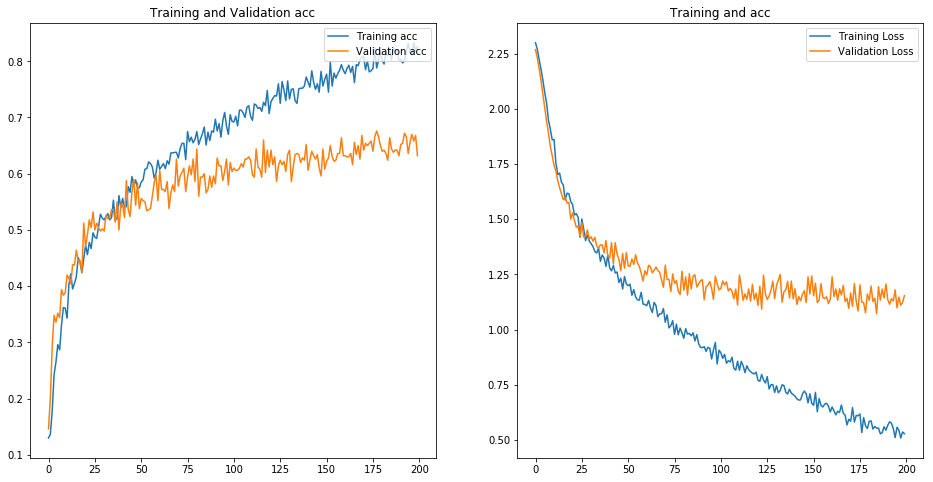

In [58]:
acc = new_history.history['acc']
val_acc = new_history.history['val_acc']

loss = new_history.history['loss']
val_loss = new_history.history['val_loss']

epochs_range = range(200)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training acc')
plt.plot(epochs_range, val_acc, label='Validation acc')
plt.legend(loc='upper right')
plt.title('Training and Validation acc')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and acc')

plt.show()